# Desafio Técnico Estagiário em Machine Learning

<a align="center">
    <img src="http://paxmidia.com.br/wp-content/uploads/2019/04/geofusion-1519076353-logo-colorida-novopng-1.png" width = "420">
</a>

## Case

Um cliente da Geofusion que atua no setor alimentício na cidade do Rio de Janeiro gostaria de entender melhor sobre o seu público alvo. Dadas
as variáveis sociodemográficas (presentes no dicionário de dados abaixo) e a
variável de performance **faturamento**, realize uma análise exploratória
trazendo insights sobre o público alvo da rede e crie um modelo de
regressão capaz de prever o faturamento em novos bairros, caso o
nosso cliente queira realizar um projeto de expansão.

|Variável     | Significado                          |
| ----------- | ------------------------------------ |
|codigo | Código do bairro|
|nome | Nome do bairro|
|cidade | Cidade|
|estado | Estado|
|população | População total|
|popAte9 | População - até 9 anos|
|popDe10a14 | População - de 10 a 14 anos|
|popDe15a19 | População - de 15 a 19 anos|
|popDe20a24 | População - de 20 a 24 anos|
|popDe25a34 | População - de 25 a 34 anos|
|popDe35a49 | População - de 35 a 49 anos|
|popDe50a59 | População - de 50 a 59 anos|
|popMaisDe60 | População - 60 anos ou mais|
|domiciliosA1 | Quantidade de Domicílios de Renda A1|
|domiciliosA2 | Quantidade de Domicílios de Renda A2|
|domiciliosB1 | Quantidade de Domicílios de Renda B1|
|domiciliosB2 | Quantidade de Domicílios de Renda B2|
|domiciliosC1 | Quantidade de Domicílios de Renda C1|
|domiciliosC2 | Quantidade de Domicílios de Renda C2|
|domiciliosD | Quantidade de Domicílios de Renda D|
|domiciliosE | Quantidade de Domicílios de Renda E|
|rendaMedia | Renda Média por Domicílio|
|faturamento | Faturamento Total no Bairro|

## 1 - Importação das Bibliotecas e Leitura dos Dados

### 1.1 - Importação das Bibliotecas

In [1]:
# Avisos

import warnings
def ignore_warn(*args, **kwargs):
    pass

# Ignorar avisos irritantes (sklearn and seaborn)
warnings.warn = ignore_warn 

# Análise e organização de dados

import pandas as pd
import numpy as np
import random as random

# Visualização

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)

# Estatística

from scipy import stats
from scipy.stats import norm, skew 

# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

### 1.2 - Leitura dos Dados

In [2]:
path = "./data.csv"

df = pd.read_csv(path)
df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0


In [3]:
# Inspeção das colunas e valores do conjunto de dados:

print('Tamanho do Dataset : {}'.format(df.shape))
print('\nCaracterísticas do Dataset: {}'.format(df.columns))

Tamanho do Dataset : (160, 23)

Características do Dataset: Index(['codigo', 'nome', 'cidade', 'estado', 'população', 'popAte9',
       'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49',
       'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2',
       'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2',
       'domiciliosD', 'domiciliosE', 'rendaMedia', 'faturamento'],
      dtype='object')


In [4]:
# Inspeção das principais informações do conjuto de dados:

print('Informação Principal do Dataset:\n')
df.info()
print('_'*45)

Informação Principal do Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domiciliosC1  160 non-null    int64  
 

As variáveis **codigo**, **nome**, **cidade** e **estado** estão relacionadas a identificação dos bairros, logo não devem ser usadas na modelagem, caso contrário, irão causar ruído nesta. Consequentemente, não serão analisadas nas etapas a seguir.

O output da última célula nos mostrou que essas variáveis de identificação não apresentam dados ausentes, logo eles podem ser deixados de lado sem nenhum problema.

## 2 - Análise Exploratória dos Dados

### 2.1 - Avaliação de Dados Ausentes:

Os valores ausentes são convertidos para o padrão do Python (NaN). Usamos as funções integradas do Python para identificar esses valores ausentes. Existem dois métodos para detectar dados ausentes:

 <code>isnull()</code> 

 <code>notnull()</code>  

A saída é um valor booleano que indica se o valor passado para o argumento não contém dados.

In [5]:
missing_data = df.isnull()
missing_data.head(5)

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
rendaMedia,3.75


In [7]:
# Plotagem dos valores ausentes em ordem decresente
# Análise feita a partir da varíavel Missing Ratio

#f, ax = plt.subplots(figsize=(15, 12))
#plt.xticks(rotation='45')
#sns.barplot(x=all_data_na.index, y=all_data_na)

Após esse avaliação, entende-se que o conjuto de dados apresenta poucos valores ausentes (NaN). 

O conjunto apresenta somente **6** valores NaN, que estão na coluna rendaMedia. Estes serão tratados com maior atenção na parte 3 desse notebook.

### 2.1 - Análise pela Descrição dos Dados:

In [8]:
# Variáveis numéricas 

df.drop('codigo', axis = 1).describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,154.000000,1.600000e+02
mean,42654.350000,5329.06250,2484.443750,3272.156250,3349.381250,6584.475000,8826.862500,5332.262500,7475.706250,388.475000,608.268750,1871.562500,2385.075000,3539.850000,3030.806250,568.37500,1821.612500,3608.071429,8.761600e+05
std,64262.949072,10816.19977,4948.827166,5752.156303,5601.893201,9049.895783,11536.276416,7986.261929,10258.307743,1403.605232,1535.237669,2973.530791,2779.071565,4324.539462,4003.047836,823.92034,2292.079295,6091.865305,4.382106e+05
min,173.000000,33.00000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.00000,2.000000,654.000000,2.465100e+04
25%,13362.750000,1512.75000,690.750000,945.000000,994.750000,2131.250000,2900.750000,1598.750000,2118.250000,0.000000,0.000000,391.500000,716.000000,1088.750000,789.750000,117.75000,431.500000,1486.000000,7.112785e+05
50%,26076.000000,3111.50000,1434.000000,2015.000000,2142.500000,4170.500000,5657.000000,3371.500000,4575.500000,0.000000,107.500000,848.000000,1536.000000,2394.500000,1861.500000,327.50000,1042.500000,1915.500000,8.242285e+05
75%,46504.500000,5622.25000,2621.500000,3448.750000,3451.750000,7145.250000,9586.750000,6333.250000,9196.000000,1.000000,430.500000,1962.500000,3065.750000,4203.000000,3652.500000,694.00000,2138.250000,2954.500000,9.343208e+05
max,667603.000000,122578.00000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.00000,14833.000000,63887.000000,2.915612e+06


### 2.2 - Análise por Visualização dos Dados:

### 2.2.1 - Variável Alvo:

**faturamento** é a variável que precisamos prever. Então, vamos fazer algumas análises sobre essa variável primeiro.


 mu = 876159.97 and sigma = 436839.04



Text(0.5, 1.0, 'Faturamento em Milhões de Reais')

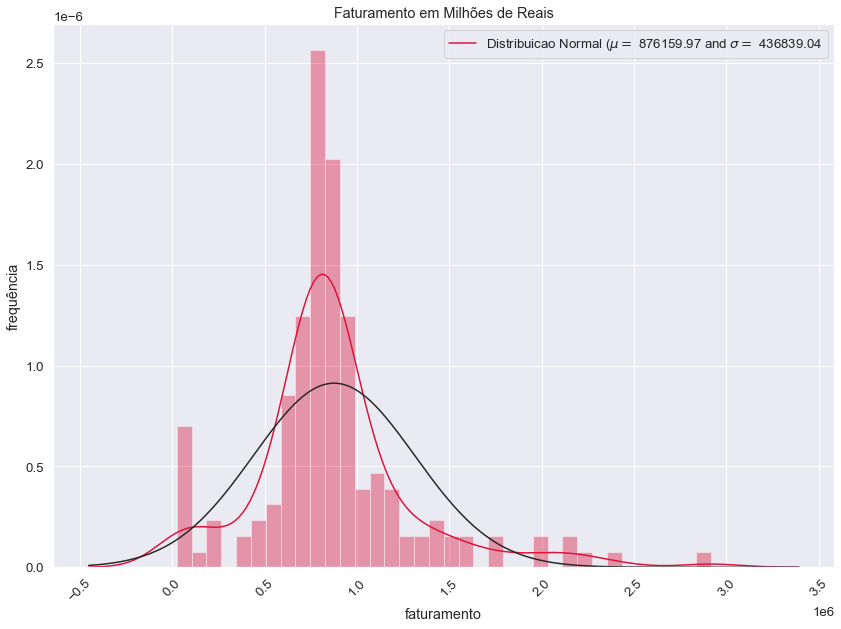

In [9]:
# Entendendo a variável faturamento

plt.figure(figsize = (14,10))

sns.distplot(df['faturamento'] , fit = norm, color = 'crimson');

# Obtenção dos parâmetros ajustados usados pela função

(mu, sigma) = norm.fit(df['faturamento'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotar a distribuição

plt.legend(['Distribuicao Normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],loc = 'best')

plt.ylabel('frequência')
plt.xticks(rotation = '45')
plt.title('Faturamento em Milhões de Reais')

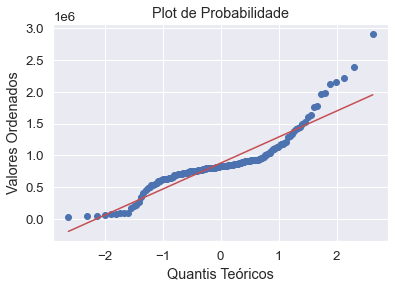

In [10]:
# QQ-plot

fig = plt.figure()
res = stats.probplot(df['faturamento'], plot = plt)

plt.title('Plot de Probabilidade')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

Tanto o histograma quanto o gráfico Q-Q demonstram que existe uma certa linearidade em relação ao faturamento, portanto, um modelo de regressão é certamente apropriado para solucionar essa problemática.

### 2.2.2 - Demais variáveis:

Primeiro é importante notar a existência de diversas faixas de população que somadas resultam na população total (o que corresponde a variável 'população'), portanto não é necessário utilizar esta na modelagem, caso contrário ira acarretar em ruídos.

O restante das variáveis são **quantitativas contínuas**, ou seja, possuem valores numéricos contáveis, por exemplo: rendaMedia.

A seguir uma breve visualização destas:

In [11]:
num_features = df.select_dtypes(exclude=['object']).drop(['codigo','população', 'faturamento'], axis=1)

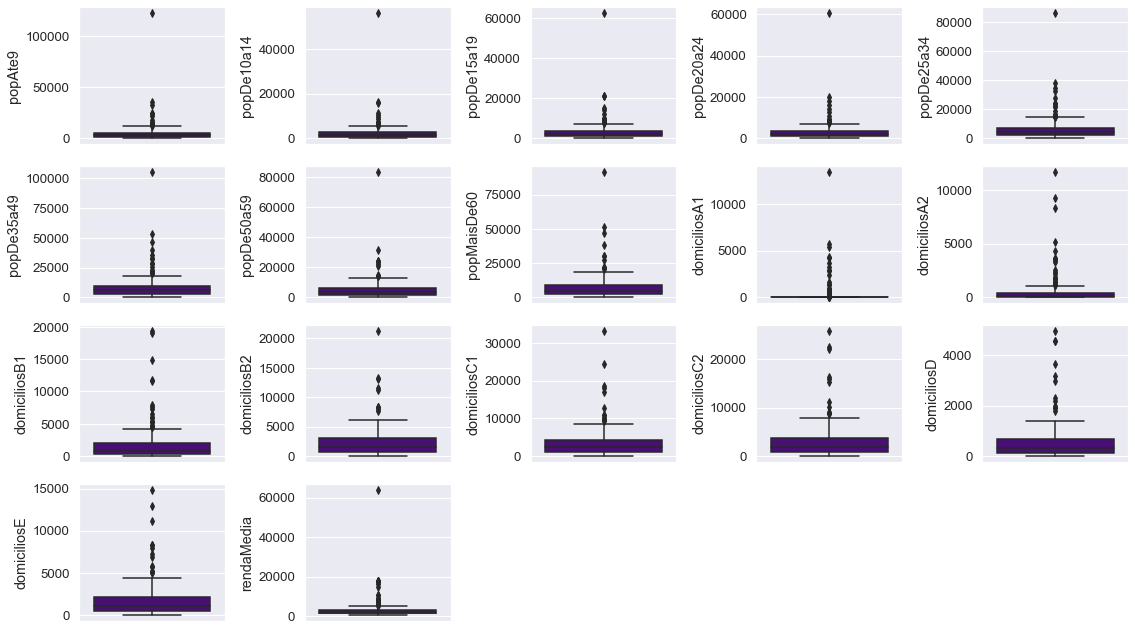

In [12]:
# Detecção de Outlier 

fig = plt.figure(figsize=(16,20))

for i in range(len(num_features.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=num_features.iloc[:,i], color = 'indigo')

plt.tight_layout()
plt.show()

O conjunto de dados apresenta uma grande quantidade de outliers (diferenças socioeconômicas entre os bairros da cidade do Rio de janeiro), portanto uma regressão mais robusta talvez seja necessária, evitando assim ruído na modelagem.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

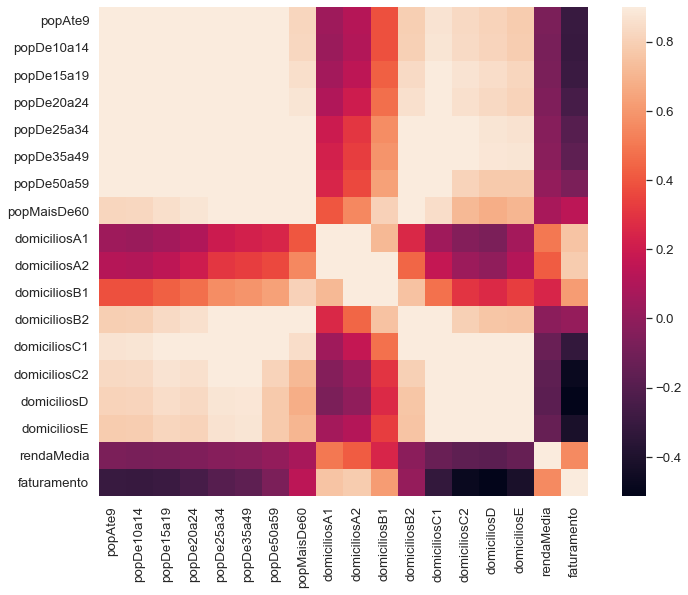

In [13]:
# Mapa de correlação para ver como as variáveis são correlacionados com X

plt.figure()
corrmat = df.select_dtypes(
    exclude=['object']).drop(['codigo', 'população'], axis = 1).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

O conjunto de dados apresenta **multicolinearidade**, ou seja, as existe uma alta correlação entre uma ou mais variáveis preditoras. Isso indica que algoritmos capazes de lidar com essas diversas correlações, tal como a **Ridge Regression**, provavelmente, terão um ótimo desempenho na resolução desse case.   

## 3 - Engenharia de Dados:

In [14]:
# Inspeção das principais informações do conjuto de dados:

print('Informação Principal do Dataset:\n')
df.info()
print('_'*45)

Informação Principal do Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domiciliosC1  160 non-null    int64  
 

### 3.1 - rendaMedia:

Como visto anteriormente, os únicos dados ausentes se encontram na coluna rendaMedia, os bairros que não apresentam esta variável são: 

In [15]:
df[df.isnull().any(axis = 1)]

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
6,3304557082,Anil,Rio de Janeiro,RJ,24855,2427,1227,1777,1804,3730,...,355,759,1771,1863,1902,1155,326,424,NaN,1092081.0
26,3304557005,Catumbi,Rio de Janeiro,RJ,12910,1773,805,1018,999,1985,...,0,18,261,640,1281,1140,229,703,NaN,791170.0
52,3304557086,Freguesia (Jacarepaguá),Rio de Janeiro,RJ,72501,7991,3709,5257,5159,10923,...,698,2569,6042,4941,5055,3919,704,1670,NaN,1297388.0
71,3304557146,Jacaré,Rio de Janeiro,RJ,9538,1326,629,763,712,1547,...,0,15,161,492,633,792,197,540,NaN,822849.0
89,3304557032,Maracanã,Rio de Janeiro,RJ,25969,1696,843,1370,1921,4020,...,739,1695,3191,1924,1522,877,0,497,NaN,1384873.0
122,3304557006,Rio Comprido,Rio de Janeiro,RJ,44998,5332,2397,3448,3757,7160,...,0,387,2119,2775,3715,3930,617,1681,NaN,789463.0


Essas **6** linhas, representam 3.75% dos dados (um valor significativo), portanto serão tratados da seguinte maneira: 

> O valor ausente será substituído pela média da variável rendaMedia dos bairros ao redor do bairro alvo. 

[Link para visualização dos bairros da cidade do Rio de Janeiro](https://www.cps.fgv.br/cps/bd/mapas/mapa-renda-favelas-bairro-quantil/index.html)

In [16]:
# Função para lidar com valores ausentes da variável rendaMedia

def fill_rendaMedia(data: pd.Dataframe, neighborhood: str, value: str) -> None:
    df.loc[df.nome == neighborhood] = \
        df.loc[df.nome == neighborhood].fillna(data[value].mean())

In [17]:
# Bairro 06: Anil

# DataFrame com os bairros que cercam Bairro 06

df_06 = df.loc[[55,72], ['nome', 'rendaMedia']]
df_06.head()

,nome,rendaMedia
55,Gardênia Azul,1837.0
72,Jacarepaguá,2160.0


In [18]:
fill_rendaMedia(df_06, 'Anil', 'rendaMedia')

In [19]:
# Bairro 26: Catumbi

# DataFrame com os bairros que cercam Bairro 26

df_26 = df.loc[[28, 30, 49, 128], ['nome', 'rendaMedia']]
df_26.head()

,nome,rendaMedia
28,Centro,2186.0
30,Cidade Nova,1809.0
49,Estácio,1631.0
128,Santa Teresa,2287.0


In [20]:
fill_rendaMedia(df_26, 'Catumbi', 'rendaMedia')

In [21]:
# Bairro 52: Freguesia (Jacarepaguá)

# DataFrame com os bairros que cercam Bairro 52

df_52 = df.loc[[2, 6, 29, 55, 72, 104, 108, 115, 138],
['nome', 'rendaMedia']]
df_52.head(10)

,nome,rendaMedia
2,Água Santa,2391.0
6,Anil,1998.5
29,Cidade De Deus,1244.0
55,Gardênia Azul,1837.0
72,Jacarepaguá,2160.0
104,Pechincha,3089.0
108,Piedade,1944.0
115,Quintino Bocaiúva,2038.0
138,Tanque,1897.0


In [22]:
fill_rendaMedia(df_52, 'Freguesia (Jacarepaguá)', 'rendaMedia')

In [23]:
# Bairro 71: Jacaré

# DataFrame com os bairros que cercam Bairro 71

df_71 = df.loc[[12, 17, 48, 63, 88, 92, 119, 123, 126],
['nome', 'rendaMedia']]
df_71.head(10)

,nome,rendaMedia
12,Benfica,1294.0
17,Cachambi,2963.0
48,Engenho Novo,2325.0
63,Higienópolis,2336.0
88,Manguinhos,1039.0
92,Maria Da Graça,2612.0
119,Riachuelo,2541.0
123,Rocha,2667.0
126,Sampaio,1751.0


In [24]:
fill_rendaMedia(df_71, 'Jacaré', 'rendaMedia')

In [25]:
# Bairro 89: Maracanã

# DataFrame com os bairros que cercam Bairro 89

df_89 = df.loc[[87, 112, 132, 133, 141, 154],
['nome', 'rendaMedia']]
df_89.head(10)

,nome,rendaMedia
87,Mangueira,1045.0
112,Praça Da Bandeira,5324.0
132,São Cristóvão,1946.0
133,São Francisco Xavier,2317.0
141,Tijuca,7844.0
154,Vila Isabel,5118.0


In [26]:
fill_rendaMedia(df_89, 'Maracanã', 'rendaMedia')

In [27]:
# Bairro 122: 	Rio Comprido

# DataFrame com os bairros que cercam Bairro 122

df_122 = df.loc[[3, 26, 49, 128, 141],
['nome', 'rendaMedia']]
df_122.head(10)

,nome,rendaMedia
3,Alto Da Boa Vista,3727.00
26,Catumbi,1978.25
49,Estácio,1631.00
128,Santa Teresa,2287.00
141,Tijuca,7844.00


In [28]:
fill_rendaMedia(df_122, 'Rio Comprido', 'rendaMedia')

In [29]:
# Inspeção das principais informações do conjuto de dados:

print('Informação Principal do Dataset:\n')
df.info()
print('_'*45)

Informação Principal do Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domiciliosC1  160 non-null    int64  
 

Todos os dadso ausentes da variável rendaMedia foram devidamente tratados,portanto o conjunto de dados está pronto para a etapa 4 (Modelagem).

## 4 - Preparação dos Dados:

### 4.1 - Limpeza do Conjunto de Dados:

In [30]:
# Inspeção das colunas e valores do conjunto de dados:

print('Tamanho do Dataset : {}'.format(df.shape))
print('\nCaracterísticas do Dataset: {}'.format(df.columns))

Tamanho do Dataset : (160, 23)

Características do Dataset: Index(['codigo', 'nome', 'cidade', 'estado', 'população', 'popAte9',
       'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49',
       'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2',
       'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2',
       'domiciliosD', 'domiciliosE', 'rendaMedia', 'faturamento'],
      dtype='object')


In [31]:
# Selecionando somente as variáveis numéricas significativas

df = df.select_dtypes(exclude=['object']).drop(['codigo','população'], axis=1)

### 4.2 - Normalizando as Variáveis Quantitativas:

In [32]:
# Não dimensionar a variável alvo

cols = df.columns.difference(['faturamento'])

# Normalizando apenas as colunas selecionadas

sc = StandardScaler()
df[cols] = sc.fit_transform(df[cols])

df.head()

,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,-0.398991,-0.405698,-0.450661,-0.456522,-0.544193,-0.567545,-0.445691,-0.445591,-0.277638,-0.302704,-0.390174,-0.412607,-0.567582,-0.569552,-0.579996,-0.664191,-0.179384,932515.0
1,-0.018369,-0.060090,-0.100304,-0.128821,-0.196692,-0.305984,-0.367939,-0.496637,-0.277638,-0.397449,-0.603720,-0.678275,-0.347912,-0.135523,0.314881,0.299526,-0.442712,588833.0
2,-0.412346,-0.422725,-0.466530,-0.463326,-0.535325,-0.587023,-0.530099,-0.592273,-0.277638,-0.334722,-0.495092,-0.625575,-0.671734,-0.628692,-0.598259,-0.686073,-0.197834,874200.0
3,-0.394818,-0.394549,-0.455544,-0.477115,-0.583876,-0.593023,-0.501335,-0.536828,-0.196164,-0.281142,-0.498803,-0.674304,-0.601913,-0.613155,-0.525208,-0.672068,0.026247,912226.0
4,0.217758,0.261396,0.282491,0.223950,0.230062,0.299573,0.229202,0.069849,-0.277638,-0.397449,-0.264002,0.157352,0.364219,0.599219,0.614391,0.629955,-0.367403,553020.0


### 4.3 - Criando as variáveis X e Y:

In [33]:
X_data = df.drop(['faturamento'], axis = 1)
Y_data = df['faturamento']

### 4.4 - Dividindo o Conjunto de Dados em Treino e Validação:

In [34]:
X_train, X_validate, y_train, y_validate = train_test_split(X_data, Y_data, test_size = 0.20, random_state = 42)


print("Número de x no conjunto de teste:", X_validate.shape[0])
print("Número de x no conjunto de treino:",X_train.shape[0])

print("Número de y no conjunto de teste:", y_validate.shape[0])
print("Número de y no conjunto de treino:",y_train.shape[0])

Número de x no conjunto de teste: 32
Número de x no conjunto de treino: 128
Número de y no conjunto de teste: 32
Número de y no conjunto de treino: 128


## 5 - Modelagem:

O case é um problema de regressão.

A ideia é prever o faturamento em novos bairros, caso o cliente queira realizar um projeto de expansão.

É realizada uma categoria de Machine Learning que se denomina aprendizado supervisionado: treinar o modelo com um determinado conjunto de dados.

Com esses dois critérios - Aprendizagem Supervisionada + Regressão, é possível restringir a escolha de modelos a alguns. Estes incluem:

1. Linear Regression
2. Robust Regression
3. Ridge Regression
4. LASSO Regression
5. Elastic Net
6. Stochastic Gradient Descent

In [35]:
def cross_val(model : str) -> float:
    
    pred = cross_val_score(model, X_data, Y_data, cv = 10)
    
    return pred.mean()

def print_evaluate(true : float, predicted : float) -> None:  
    
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

    print('__________________________________')
    
def evaluate(true : float, predicted : float) -> list:

    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

### Métricas de avaliação de regressão 

***
Aqui estão três métricas de avaliação comuns para problemas de regressão :

> - **Mean Absolute Error** (MAE): é a média do valor absoluto dos erros :
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE): é a média dos erros quadrados:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE): é a raiz quadrada da média dos erros quadrados :
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> Comparando essas métricas:
- ** MAE ** é o mais fácil de entender, porque é o erro médio.
- ** MSE ** é mais popular do que MAE, porque MSE "pune" erros maiores, o que tende a ser útil no mundo real.
- ** RMSE ** é ainda mais popular do que MSE, porque RMSE pode ser interpretado nas unidades "y".

***

### 5.1 - Linear Regression:

In [36]:
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

### Avaliação do Modelo:

In [37]:
# Print do intercept

print(lin_reg.intercept_)

892435.3335552857


In [38]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_data.columns, columns=['Coefficient'])
coeff_df

,Coefficient
popAte9,-6.604396e+05
popDe10a14,-3.834300e+05
popDe15a19,1.538647e+06
popDe20a24,-1.349918e+06
popDe25a34,1.219497e+06
popDe35a49,-7.473035e+05
popDe50a59,8.620520e+05
popMaisDe60,-1.939388e+05
domiciliosA1,1.482967e+05
domiciliosA2,3.645565e+04


### Predições do Modelo:

Vamos pegar as previsões de nosso conjunto de teste e ver como ele se saiu! 

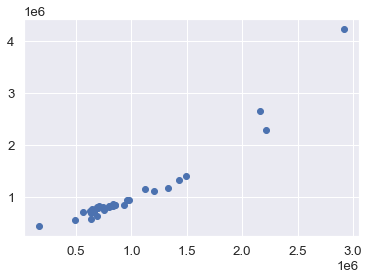

In [39]:
pred = lin_reg.predict(X_validate)

plt.scatter(y_validate, pred)

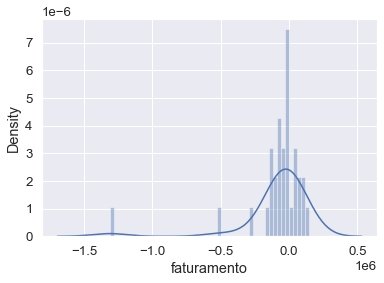

In [40]:
# Histograma residual

sns.distplot((y_validate - pred), bins = 50);

In [41]:
test_pred = lin_reg.predict(X_validate)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_validate, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 123698.16298555999
MSE: 69584533334.87274
RMSE: 263788.8044153367
R2 Square 0.7672314199853618
__________________________________
Train set evaluation:
_____________________________________
MAE: 62320.97288886058
MSE: 8021361675.863956
RMSE: 89562.05488857409
R2 Square 0.9500962352831186
__________________________________


In [42]:
results_df = pd.DataFrame(data = [["Linear Regression", *evaluate(y_validate, test_pred) , cross_val(LinearRegression())]], 
                          columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,123698.162986,6.958453e+10,263788.804415,0.767231,0.063026


### 5.2 - Robust Regression:

Fonte: [Wikipedia - Robust Regression](https://en.wikipedia.org/wiki/Robust_regression)

***
> A regressão robusta é uma forma de análise de regressão projetada para superar algumas limitações dos métodos paramétricos e não paramétricos tradicionais. Métodos de regressão robustos são projetados para não serem excessivamente afetados por violações de suposições pelo processo de geração de dados subjacente.

> Um caso em que uma estimativa robusta deve ser considerada é quando há uma forte suspeita de `heterocedasticidade`.

> Uma situação comum em que uma estimativa robusta é usada ocorre quando os dados contêm outliers. Na presença de outliers que não vêm do mesmo processo de geração de dados que o restante dos dados, a estimativa de mínimos quadrados é ineficiente e pode ser enviesada. Como as previsões de mínimos quadrados são arrastadas para os valores discrepantes e a variância das estimativas é artificialmente inflada, o resultado é que os valores discrepantes podem ser mascarados. (Em muitas situações, incluindo algumas áreas da geoestatística e estatísticas médicas, são precisamente os valores discrepantes que interessam.)

***

### Random Sample Consensus - RANSAC

Fonte: [Wikipedia - RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus)

***
> O Random Sample Consensus (RANSAC) é um método iterativo para estimar parâmetros de um modelo matemático a partir de um conjunto de dados observados que contém outliers, quando outliers não devem ter influência sobre os valores das estimativas. Portanto, também pode ser interpretado como um método de detecção de outlier.

> Uma suposição básica é que os dados consistem em "inliers", ou seja, dados cuja distribuição pode ser explicada por algum conjunto de parâmetros do modelo, embora possam estar sujeitos a ruído, e "outliers" que são dados que não se enquadram no modelo. Os outliers podem vir, por exemplo, de valores extremos do ruído ou de medições errôneas ou hipóteses incorretas sobre a interpretação dos dados. O RANSAC também assume que, dado um conjunto (geralmente pequeno) de inliers, existe um procedimento que pode estimar os parâmetros de um modelo que explica ou se ajusta de maneira ótima a esses dados. 

***

In [43]:
model = RANSACRegressor(base_estimator = LinearRegression(), max_trials = 100)
model.fit(X_train, y_train)

test_pred = model.predict(X_validate)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_validate, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 67960.10805649802
MSE: 67857324729.650345
RMSE: 260494.38521712966
R2 Square 0.7730091391875856
__________________________________
Train set evaluation:
_____________________________________
MAE: 71049.38982471253
MSE: 122010567979.03737
RMSE: 349300.1116218507
R2 Square 0.24092854512221673
__________________________________


In [44]:
results_df_2 = pd.DataFrame(data = [["Robust Regression", *evaluate(y_validate, test_pred) , cross_val(RANSACRegressor())]], 
                            columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index = True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,123698.162986,6.958453e+10,263788.804415,0.767231,0.063026
1,Robust Regression,67960.108056,6.785732e+10,260494.385217,0.773009,-0.512565


### 5.3 - Ridge Regression:

 Fonte: [Wikipedia - Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization)

***
> A regressão Ridge aborda alguns dos problemas de ** Mínimos Quadrados Ordinários ** impondo uma penalidade no tamanho dos coeficientes. Os coeficientes de crista minimizam uma soma residual de quadrados penalizada:

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $ \ alpha> = 0 $ é um parâmetro de complexidade que controla a quantidade de encolhimento: quanto maior o valor de $ \ alpha $, maior a quantidade de encolhimento e, portanto, os coeficientes se tornam mais robustos à colinearidade.

> A regressão Ridge é um modelo penalizado $\ell_2$ que adiciona a soma quadrada dos pesos à função de custo dos mínimos quadrados.

*** 

In [45]:
model = Ridge(alpha = 100, solver ='cholesky', tol = 0.0001, random_state = 42)
model.fit(X_train, y_train)
pred = model.predict(X_validate)

test_pred = model.predict(X_validate)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_validate, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 122471.10054934106
MSE: 25907775997.45951
RMSE: 160958.92642987997
R2 Square 0.9133353930643702
__________________________________
Train set evaluation:
_____________________________________
MAE: 104143.48906346541
MSE: 23047954030.50435
RMSE: 151815.5263156715
R2 Square 0.8566104208211126
__________________________________


In [46]:
results_df_2 = pd.DataFrame(data = [["Ridge Regression", *evaluate(y_validate, test_pred) , cross_val(Ridge())]], 
                            columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index = True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,123698.162986,6.958453e+10,263788.804415,0.767231,0.063026
1,Robust Regression,67960.108056,6.785732e+10,260494.385217,0.773009,-0.512565
2,Ridge Regression,122471.100549,2.590778e+10,160958.926430,0.913335,0.807385


### 5.4 - LASSO Regression:

Fonte: [Wikipedia - LASSO Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)

***
> Um modelo linear que estima coeficientes esparsos.

> Matematicamente, consiste em um modelo linear treinado com $\ell_1$ previamente como regularizador. A função objetivo para minimizar é:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> A estimativa do laço resolve assim a minimização da penalidade dos mínimos quadrados com $\alpha \big|\big|w\big|\big|_1$ adicionado, onde $\alpha$ é uma constante e $\big|\big|w\big|\big|_1$ é a $\ell_1-norm$ do vetor de parâmetro.

***

In [47]:
model = Lasso(alpha = 0.1, 
              precompute = True, 
#               warm_start=True, 
              positive = True, 
              selection ='random',
              random_state = 42)
model.fit(X_train, y_train)

test_pred = model.predict(X_validate)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_validate, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 175176.78849092452
MSE: 71335892073.63351
RMSE: 267087.79843645706
R2 Square 0.7613729157002829
__________________________________
Train set evaluation:
_____________________________________
MAE: 180010.91882150705
MSE: 66474385474.88721
RMSE: 257826.26994720148
R2 Square 0.5864390328614932
__________________________________


In [48]:
results_df_2 = pd.DataFrame(data = [["Lasso Regression", *evaluate(y_validate, test_pred) , cross_val(Lasso())]], 
                            columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index = True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,123698.162986,6.958453e+10,263788.804415,0.767231,0.063026
1,Robust Regression,67960.108056,6.785732e+10,260494.385217,0.773009,-0.512565
2,Ridge Regression,122471.100549,2.590778e+10,160958.926430,0.913335,0.807385
3,Lasso Regression,175176.788491,7.133589e+10,267087.798436,0.761373,-0.247541


### 5.5 - Elastic Net:

Fonte: [Wikipedia - Elastic Net](https://en.wikipedia.org/wiki/Elastic_net_regularization)

***
> Um modelo de regressão linear treinado com $\ell_1$ e $\ell_2$ previamente como regularizador.

> Esta combinação permite aprender um modelo esparso onde poucos dos pesos são diferentes de zero como Lasso, enquanto ainda mantém as propriedades de regularização de Ridge.

> Elastic-net é útil quando há vários recursos correlacionados entre si. Lasso provavelmente escolherá um desses aleatoriamente, enquanto Elastic-net provavelmente escolherá ambos.

> Uma vantagem prática da troca entre Lasso e Ridge é que permite que a Elastic-Net herde parte da estabilidade de Ridge sob rotação.

> A função objetivo a minimizar é, neste caso: 

> $\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$

***

In [49]:
model = ElasticNet(alpha = 0.1, l1_ratio = 0.9, selection ='random', random_state = 42)
model.fit(X_train, y_train)

test_pred = model.predict(X_validate)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_validate, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 105422.62585974018
MSE: 34587464193.43924
RMSE: 185977.05286792573
R2 Square 0.8843007987440329
__________________________________
Train set evaluation:
_____________________________________
MAE: 64208.32753486716
MSE: 9836113654.933163
RMSE: 99177.18313671327
R2 Square 0.9388060130686702
__________________________________


In [50]:
results_df_2 = pd.DataFrame(data = [["Elastic Net Regression", *evaluate(y_validate, test_pred) , cross_val(ElasticNet())]], 
                            columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index = True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,123698.162986,6.958453e+10,263788.804415,0.767231,0.063026
1,Robust Regression,67960.108056,6.785732e+10,260494.385217,0.773009,-0.512565
2,Ridge Regression,122471.100549,2.590778e+10,160958.926430,0.913335,0.807385
3,Lasso Regression,175176.788491,7.133589e+10,267087.798436,0.761373,-0.247541
4,Elastic Net Regression,105422.625860,3.458746e+10,185977.052868,0.884301,0.862664


### 5.6 - Stochastic Gradient Descent:

Fonte: [Wikipedia - Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

***
> Gradient Descent é um algoritmo de otimização muito genérico, capaz de encontrar soluções ótimas para uma ampla gama de problemas. A ideia geral do Gradient Sescent é ajustar os parâmetros de forma iterativa para minimizar uma função de custo. Gradient Descent mede o gradiente local da função de erro em relação ao vetor de parâmetros, e vai na direção do gradiente descendente. Assim que o gradiente for zero, você atingiu o mínimo.

***

In [51]:
sgd_reg = SGDRegressor(n_iter_no_change = 250, penalty = None, eta0 = 0.0001, max_iter = 100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_validate)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_validate, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 102676.58606570654
MSE: 28437212486.807655
RMSE: 168633.36706241636
R2 Square 0.9048741257159304
__________________________________
Train set evaluation:
_____________________________________
MAE: 65179.21326604628
MSE: 10672843459.044418
RMSE: 103309.45483857911
R2 Square 0.933600417190652
__________________________________


In [52]:
results_df_2 = pd.DataFrame(data = [["Stochastic Gradient Descent", *evaluate(y_validate, test_pred), 0]], 
                            columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index = True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,123698.162986,6.958453e+10,263788.804415,0.767231,0.063026
1,Robust Regression,67960.108056,6.785732e+10,260494.385217,0.773009,-0.512565
2,Ridge Regression,122471.100549,2.590778e+10,160958.926430,0.913335,0.807385
3,Lasso Regression,175176.788491,7.133589e+10,267087.798436,0.761373,-0.247541
4,Elastic Net Regression,105422.625860,3.458746e+10,185977.052868,0.884301,0.862664
5,Stochastic Gradient Descent,102676.586066,2.843721e+10,168633.367062,0.904874,0.000000


## 6 - Comparação dos Modelos:

<AxesSubplot:ylabel='Model'>

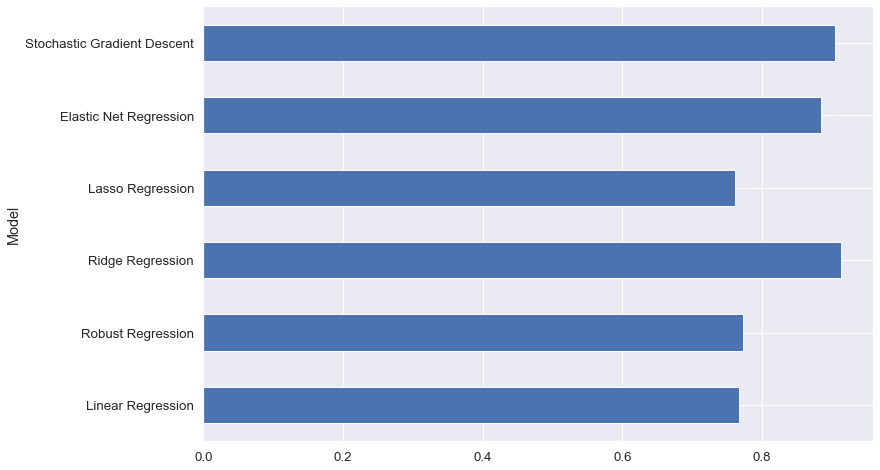

In [53]:
results_df.set_index('Model', inplace = True)
results_df['R2 Square'].plot(kind = 'barh', figsize = (12, 8))

Como dito anteriormente (parte 2), a **Ridge Regression**, teve o melhor desempenho entre os algoritmos testados devido a multicolinearidade presente do conjunto de dados. 

## 7 - Otimização:

* Reavaliar as variáveis e seus redimensionamentos.
* Hiperparametrização dos melhores modelos visando sua otimizar o rsultado final.